In [28]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

In [29]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
from visual_behavior.data_access import loading as loading

from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

In [31]:
import visual_behavior.visualization.utils as utils

import visual_behavior.data_access.utilities as utilities

import visual_behavior.visualization.ophys.platform_paper_figures as ppf

In [32]:
cache_dir = loading.get_platform_analysis_cache_dir()
cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir)
experiments_table = cache.get_ophys_experiment_table()
len(experiments_table)

1941

### load experiments_table from cache

In [33]:
cache_dir = loading.get_platform_analysis_cache_dir()
cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=cache_dir)
# print(cache_dir)

In [34]:
experiments_table = loading.get_platform_paper_experiment_table()
print(len(experiments_table))

1249


In [35]:
dataset = cache.get_behavior_ophys_experiment(experiments_table.index[0])
dataset.metadata

In [38]:
dataset.metadata['imaging_plane_group_count']

0

In [40]:
meso_expts = experiments_table[experiments_table.project_code=='VisualBehaviorMultiscope']
depths_list = []
for experiment_id in meso_expts.index.values:
    dataset = cache.get_behavior_ophys_experiment(experiment_id)
    m = dataset.metadata.copy()
    depths_list.append([experiment_id,  m['imaging_plane_group'], m['imaging_plane_group_count']])
depths_df = pd.DataFrame(depths_list, columns=['ophys_experiment_id', 'imaging_plane_group', 'imaging_plane_group_count'])


C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\behavior\data_objects\rewards.py:58: UserWarning: This session '886585130' has no rewards data.
  warnings.warn("This session "
C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\behavior\data_objects\rewards.py:58: UserWarning: This session '886585130' has no rewards data.
  warnings.warn("This session "
C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\behavior\data_objects\licks.py:95: UserWarning: This session '888879674' has no rewards data.
  warnings.warn("This session "
C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\behavior\data_objects\rewards.py:58: UserWarning: This session '888879674' has no rewards data.
  warnings.warn("This session "
C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\behavior\data_objects\licks.py:95: UserWarning: This session '888879674' has no rewards data.
  warnings.warn("This session "
C:\Users\marinag\Documen

In [41]:
depths_df

[autoreload of visual_behavior.data_access.utilities failed: Traceback (most recent call last):
  File "C:\Users\marinag\Anaconda3\envs\visual_behavior_sdk\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\marinag\Anaconda3\envs\visual_behavior_sdk\lib\site-packages\IPython\extensions\autoreload.py", line 450, in superreload
    update_generic(old_obj, new_obj)
  File "C:\Users\marinag\Anaconda3\envs\visual_behavior_sdk\lib\site-packages\IPython\extensions\autoreload.py", line 387, in update_generic
    update(a, b)
  File "C:\Users\marinag\Anaconda3\envs\visual_behavior_sdk\lib\site-packages\IPython\extensions\autoreload.py", line 357, in update_class
    update_instances(old, new)
  File "C:\Users\marinag\Anaconda3\envs\visual_behavior_sdk\lib\site-packages\IPython\extensions\autoreload.py", line 317, in update_instances
    update_instances(old, new, obj, visited)
  File "C:\Users\marinag\Anaconda3\e

,ophys_experiment_id,imaging_plane_group,imaging_plane_group_count
0,882551960,1,4
1,885146785,1,4
2,886003527,1,4
3,886585130,1,4
4,887386955,1,4
...,...,...,...
862,1086910729,2,4
863,1087430659,2,4
864,1087825608,2,4
865,1088351118,2,4


In [42]:
depths_df.to_csv(os.path.join(loading.get_platform_analysis_cache_dir(), 'VisualBehaviorMultiscope_imaging_plane_groups.csv'))

In [18]:
# experiments_table = utilities.add_cell_type_column(experiments_table)
# experiments_table = utilities.add_experience_exposure_column(experiments_table)
# experiments_table = utilities.add_binned_depth_column(experiments_table)

### get useful info

In [19]:
experience_level = np.sort(experiments_table.experience_level.unique())
print(experience_level)

['Familiar' 'Novel 1' 'Novel >1']


In [20]:
exposures = np.sort(experiments_table.experience_exposure.unique())
print(exposures)

['Familiar 0' 'Familiar 1' 'Familiar 2' 'Familiar 3' 'Familiar > 3'
 'Novel 0' 'Novel 1' 'Novel 2' 'Novel 3' 'Novel > 3']


In [21]:
cell_types = np.sort(experiments_table.cell_type.unique())[::-1]
print(cell_types)

['Vip Inhibitory' 'Sst Inhibitory' 'Excitatory']


### get multi_session_df

In [22]:
%%time

# set various params
df_name = 'trials_response_df'
conditions = ['cell_specimen_id', 'stimulus_change', 'epoch']
use_events = True
filter_events = False

# load multi_session_df
multi_session_df = loading.get_multi_session_df(cache_dir, df_name, conditions, experiments_table, 
                                                use_events=use_events, filter_events=filter_events)
print(len(multi_session_df.ophys_experiment_id.unique()))

original_multi_session_df = multi_session_df.copy()

# limit to platform paper dataset
multi_session_df = multi_session_df[multi_session_df.ophys_experiment_id.isin(experiments_table.index.values)]
print(len(multi_session_df.ophys_experiment_id.unique()))

# merge with metadata
multi_session_df = multi_session_df.merge(experiments_table, on='ophys_experiment_id')
print(len(multi_session_df.ophys_experiment_id.unique()))

multi_session_df = multi_session_df.reset_index(drop=True)

1305
1249
1249
Wall time: 1min 18s


In [23]:
multi_session_df.stimulus_change.unique()

array([ True])

### get rid of weird 7th epoch

In [24]:
# this epoch is <10 mins long, just a few mins over the 60 min mark for the task
multi_session_df = multi_session_df[multi_session_df.epoch!=6] # its the 6th index

### add experience_epoch column

In [25]:
def merge_experience_epoch(row):
    return row.experience_level+' epoch '+str(int(row.epoch)+1)

In [26]:
multi_session_df['experience_epoch'] = multi_session_df[['experience_level', 'epoch']].apply(axis=1, func=merge_experience_epoch)

experience_epoch = np.sort(multi_session_df.experience_epoch.unique())
experience_epoch

array(['Familiar epoch 1', 'Familiar epoch 2', 'Familiar epoch 3',
       'Familiar epoch 4', 'Familiar epoch 5', 'Familiar epoch 6',
       'Novel 1 epoch 1', 'Novel 1 epoch 2', 'Novel 1 epoch 3',
       'Novel 1 epoch 4', 'Novel 1 epoch 5', 'Novel 1 epoch 6',
       'Novel >1 epoch 1', 'Novel >1 epoch 2', 'Novel >1 epoch 3',
       'Novel >1 epoch 4', 'Novel >1 epoch 5', 'Novel >1 epoch 6'],
      dtype=object)

### plot by exposure 

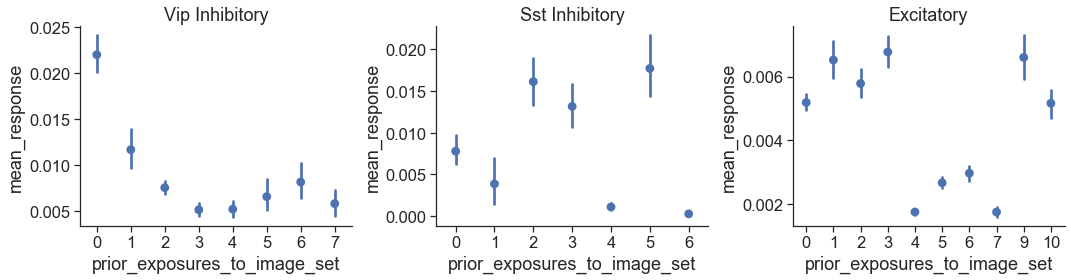

In [27]:
df = multi_session_df.copy()
df = df[df.passive==False]
df['prior_exposures_to_image_set'] = [int(x) for x in df.prior_exposures_to_image_set.values]

fig, ax = plt.subplots(1,3, figsize=(15,4))
for i, cell_type in enumerate(cell_types):
    ax[i] = sns.pointplot(data=df[(df.cell_type==cell_type)&(df.experience_level!='Familiar')],
                  x='prior_exposures_to_image_set', y='mean_response', 
                       join=False, dodge=0.5, ax=ax[i])
    ax[i].set_title(cell_type)
#     ax[i].legend(title='', fontsize='small', bbox_to_anchor=(1,1))
fig.tight_layout()

### before any filtering

In [50]:
df = multi_session_df.copy()
df = df.reset_index()

In [51]:
utilities.count_mice_expts_containers_cells(df)

n_mouse_id  n_ophys_experiment_id  \
cell_type      experience_level                                      
Excitatory     Familiar                  41                    280   
               Novel 1                   36                     71   
               Novel >1                  41                    196   
Sst Inhibitory Familiar                  19                    144   
               Novel 1                   15                     37   
               Novel >1                  19                    107   
Vip Inhibitory Familiar                  22                    217   
               Novel 1                   17                     47   
               Novel >1                  22                    150   

                                 n_ophys_container_id  n_cell_specimen_id  
cell_type      experience_level                                            
Excitatory     Familiar                            88               18782  
               Novel 1                             71                9225  
               Novel >1                            88               15705  
Sst Inhibitory Familiar                            46                 738  
               Novel 1                             37                 414  
               Novel >1                            45                 678  
Vip Inhibitory Familiar                            69                1852  
               Novel 1                             47                 792  
               Novel >1                            66                1547

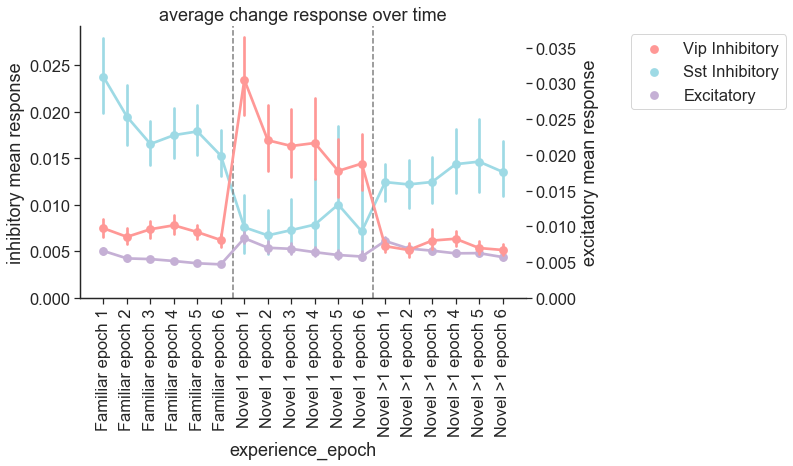

In [52]:
fig, ax = plt.subplots(figsize=(8,5))
ax2 = ax.twinx()
cre_line_colors = utils.get_cre_line_colors()
ax2 = sns.pointplot(data=df[df.cell_type==cell_types[0]], x='experience_epoch', y='mean_response', hue='cell_type', 
                   order=experience_epoch, palette=cre_line_colors, hue_order=cell_types, ax=ax2)
ax2.set_ylabel('excitatory mean response')
ax2.legend(bbox_to_anchor=(1.6,1))
ax2.set_ylim(ymin=0)
ax = sns.pointplot(data=df[df.cell_type.isin(cell_types[1:])], x='experience_epoch', y='mean_response', hue='cell_type', 
                   order=experience_epoch, palette=cre_line_colors[1:], hue_order=cell_types[1:], ax=ax)
ax.set_ylabel('inhibitory mean response')
ax.set_ylim(ymin=0)
# ax.legend(bbox_to_anchor=(1.2,1))
ax.get_legend().remove()
ax.set_xticklabels(experience_epoch, rotation=90);
ax.set_title('average change response over time')
ax.vlines(x=5.5, ymin=0, ymax=1, color='gray', linestyle='--')
ax.vlines(x=11.5, ymin=0, ymax=1, color='gray', linestyle='--')

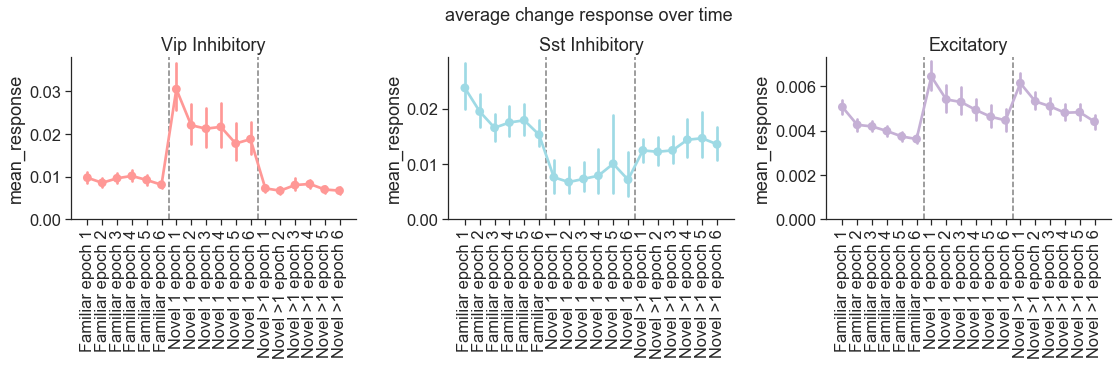

In [53]:
cre_line_colors = utils.get_cre_line_colors()
fig, ax = plt.subplots(1,3, figsize=(16,5), sharex=True, sharey=False)

for i,cell_type in enumerate(cell_types):
    data = df[df.cell_type==cell_type]
    ax[i] = sns.pointplot(data=data, x='experience_epoch', y='mean_response', 
                       order=experience_epoch, color=cre_line_colors[i], ax=ax[i])
    ax[i].set_ylim(ymin=0)
    ax[i].set_title(cell_type)
    ax[i].set_xlabel('')
#     if i > 0:
#         ax[i].set_xlabel('')
    ax[i].set_xticklabels(experience_epoch, rotation=90);
    ax[i].vlines(x=5.5, ymin=0, ymax=1, color='gray', linestyle='--')
    ax[i].vlines(x=11.5, ymin=0, ymax=1, color='gray', linestyle='--')
plt.suptitle('average change response over time', x=0.53, y=1.03, fontsize=18)
fig.tight_layout()

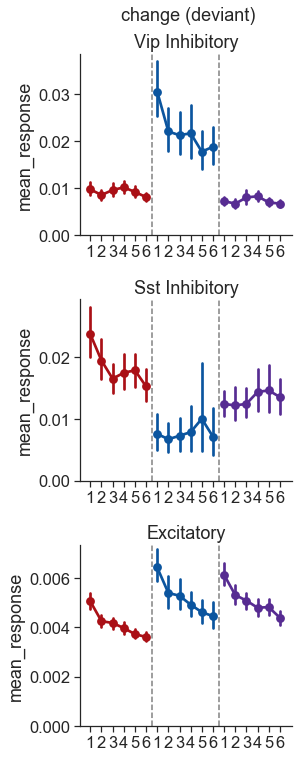

In [54]:
xticks = [experience_epoch.split(' ')[-1] for experience_epoch in np.sort(df.experience_epoch.unique())]

palette = utils.get_experience_level_colors()
fig, ax = plt.subplots(3,1, figsize=(4.5,10.5), sharex=False, sharey=False)

for i,cell_type in enumerate(cell_types):
    data = df[df.cell_type==cell_type]
    ax[i] = sns.pointplot(data=data, x='experience_epoch', y='mean_response', hue='experience_level',
                       order=experience_epoch, palette=palette, ax=ax[i])
    ax[i].set_ylim(ymin=0)
    ax[i].set_title(cell_type)
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
#     ax[i].set_ylim(0,0.022)
#     ax[i].set_xticklabels(experience_epoch, rotation=90);
    ax[i].set_xticklabels(xticks)
    ax[i].vlines(x=5.5, ymin=0, ymax=1, color='gray', linestyle='--')
    ax[i].vlines(x=11.5, ymin=0, ymax=1, color='gray', linestyle='--')
plt.suptitle('change (deviant)', x=0.62, y=1.01, fontsize=18)
fig.tight_layout()

C:\Users\marinag\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


107


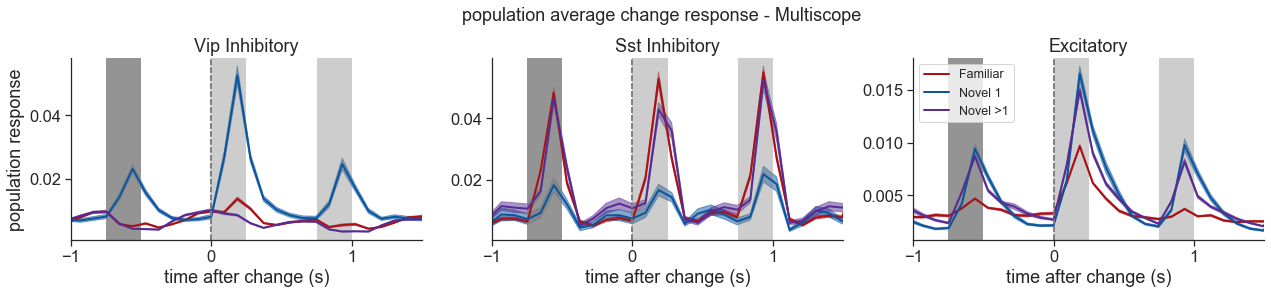

In [55]:
# plot
project_code = 'VisualBehaviorMultiscope'
# get timestamps 
multiscope_expt = experiments_table[experiments_table.project_code==project_code].index.values[9] 
timestamps = ppf.get_timestamps_for_response_df_type(cache, multiscope_expt, df_name)

axes_column = 'cell_type'
hue_column = 'experience_level'
palette = utilities.get_experience_level_colors()
xlim_seconds = [-1,1.5]

tmp = df[df.project_code==project_code]
# df = df[df.experience_level!='Novel >1']
# df = df[df.pref_stim==True]

ppf.plot_population_averages_for_conditions(tmp, df_name, timestamps, 
                                            axes_column, hue_column, project_code=project_code,
                                            use_events=use_events, filter_events=filter_events, 
                                            xlim_seconds=xlim_seconds, palette=palette,
                                            horizontal=True, save_dir=None, folder=None)

### single cell plots

In [ ]:
conditions = ['Novel 1', 'Novel >1']
df = multi_session_df.copy()
df = df[df.experience_level.isin(conditions)]
df = df[df.epoch==0]
sns.swarmplot(data=df, x='cell_type', y='mean_response', hue='experience_level', 
             order=cell_types, palette=palette, hue_order=conditions)

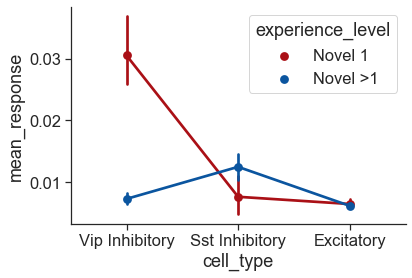

In [56]:
conditions = ['Novel 1', 'Novel >1']
df = multi_session_df.copy()
df = df[df.experience_level.isin(conditions)]
df = df[df.epoch==0]
sns.pointplot(data=df, x='cell_type', y='mean_response', hue='experience_level', 
             order=cell_types, palette=palette, hue_order=conditions, join=False, dodge=0.4)

In [62]:
# conditions = ['Novel 1', 'Novel >1']
# df = multi_session_df.copy()
# df = df[df.experience_level.isin(conditions)]
# df = df[df.epoch==0]
# df = df[df.mean_response<0.5]
# palette = utils.get_experience_level_colors()
# sns.swarmplot(data=df, x='cell_type', y='mean_response', hue='experience_level', 
#              order=cell_types, palette=palette, hue_order=conditions, )

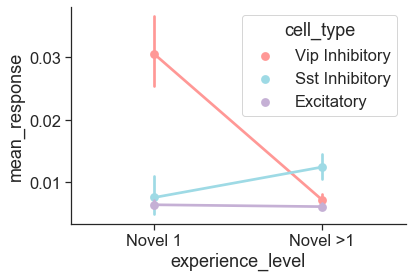

In [57]:
conditions = ['Novel 1', 'Novel >1']
df = multi_session_df.copy()
df = df[df.experience_level.isin(conditions)]
df = df[df.epoch==0]
palette = utils.get_cre_line_colors()
fig, ax = plt.subplots()
sns.pointplot(data=df, x='experience_level', y='mean_response', hue='cell_type', 
             order=conditions, palette=palette, hue_order=cell_types, ax=ax)
ax.

### limit to containers with all 3 experience levels

In [20]:
df = multi_session_df.copy()
df = utilities.limit_to_containers_with_all_experience_levels(df)

In [21]:
utilities.count_mice_expts_containers_cells(df)

n_mouse_id  n_ophys_experiment_id  \
cell_type      experience_level                                      
Excitatory     Familiar                  36                    227   
               Novel 1                   36                     71   
               Novel >1                  36                    142   
Sst Inhibitory Familiar                  15                    115   
               Novel 1                   15                     37   
               Novel >1                  15                     85   
Vip Inhibitory Familiar                  17                    138   
               Novel 1                   17                     44   
               Novel >1                  17                     96   

                                 n_ophys_container_id  n_cell_specimen_id  
cell_type      experience_level                                            
Excitatory     Familiar                            71               15268  
               Novel 1                             71                9225  
               Novel >1                            71               11962  
Sst Inhibitory Familiar                            37                 598  
               Novel 1                             37                 414  
               Novel >1                            37                 548  
Vip Inhibitory Familiar                            44                1233  
               Novel 1                             44                 742  
               Novel >1                            44                1067

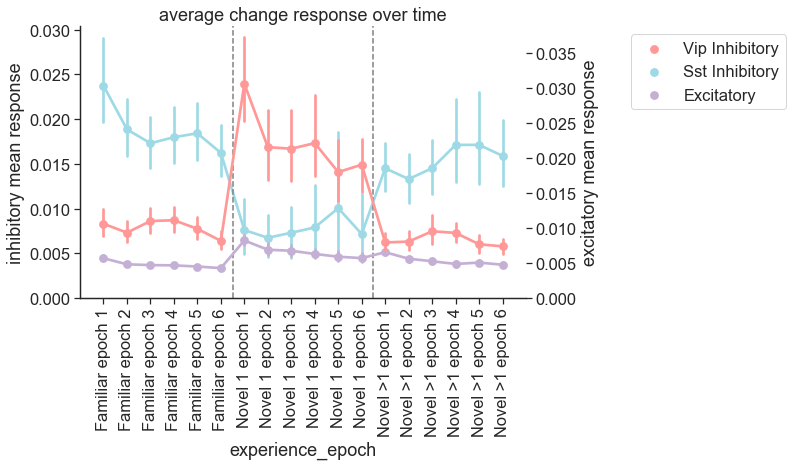

In [22]:
fig, ax = plt.subplots(figsize=(8,5))
ax2 = ax.twinx()
cre_line_colors = utils.get_cre_line_colors()
ax2 = sns.pointplot(data=df[df.cell_type==cell_types[0]], x='experience_epoch', y='mean_response', hue='cell_type', 
                   order=experience_epoch, palette=cre_line_colors, hue_order=cell_types, ax=ax2)
ax2.set_ylabel('excitatory mean response')
ax2.legend(bbox_to_anchor=(1.6,1))
ax2.set_ylim(ymin=0)
ax = sns.pointplot(data=df[df.cell_type.isin(cell_types[1:])], x='experience_epoch', y='mean_response', hue='cell_type', 
                   order=experience_epoch, palette=cre_line_colors[1:], hue_order=cell_types[1:], ax=ax)
ax.set_ylabel('inhibitory mean response')
ax.set_ylim(ymin=0)
# ax.legend(bbox_to_anchor=(1.2,1))
ax.get_legend().remove()
ax.set_xticklabels(experience_epoch, rotation=90);
ax.set_title('average change response over time')
ax.vlines(x=5.5, ymin=0, ymax=1, color='gray', linestyle='--')
ax.vlines(x=11.5, ymin=0, ymax=1, color='gray', linestyle='--')

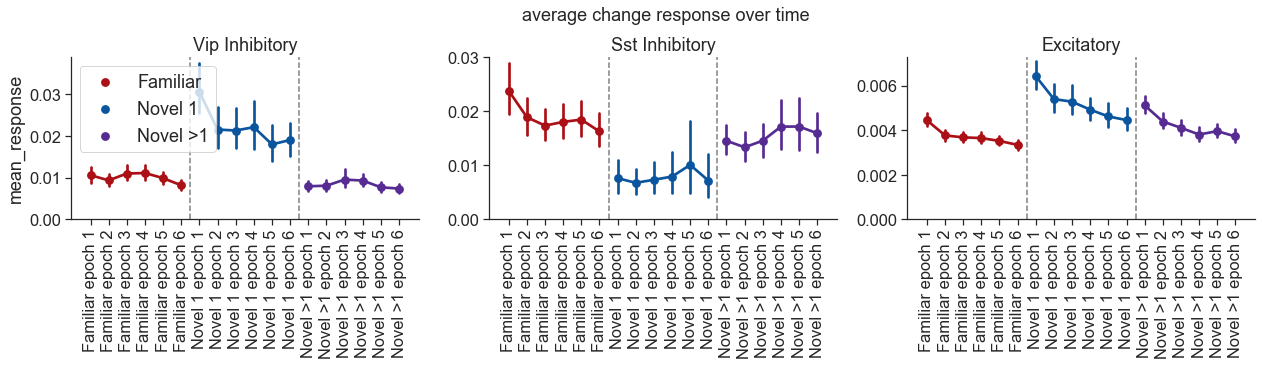

In [23]:
# cre_line_colors = utils.get_cre_line_colors()
palette = utils.get_experience_level_colors()
fig, ax = plt.subplots(1,3, figsize=(18,5), sharex=True, sharey=False)

for i,cell_type in enumerate(cell_types):
    data = df[df.cell_type==cell_type]
    ax[i] = sns.pointplot(data=data, x='experience_epoch', y='mean_response', hue='experience_level',
                       order=experience_epoch, palette=palette, ax=ax[i])
    ax[i].set_ylim(ymin=0)
    ax[i].set_title(cell_type)
    ax[i].set_xlabel('')
    if i > 0:
        ax[i].set_ylabel('')
        ax[i].get_legend().remove()
    else:
        ax[i].legend(loc='upper left', fontsize='medium')
#     ax[i].set_ylim(0,0.022)
    ax[i].set_xticklabels(experience_epoch, rotation=90);
    ax[i].vlines(x=5.5, ymin=0, ymax=1, color='gray', linestyle='--')
    ax[i].vlines(x=11.5, ymin=0, ymax=1, color='gray', linestyle='--')
plt.suptitle('average change response over time', x=0.53, y=1.03, fontsize=18)
fig.tight_layout()

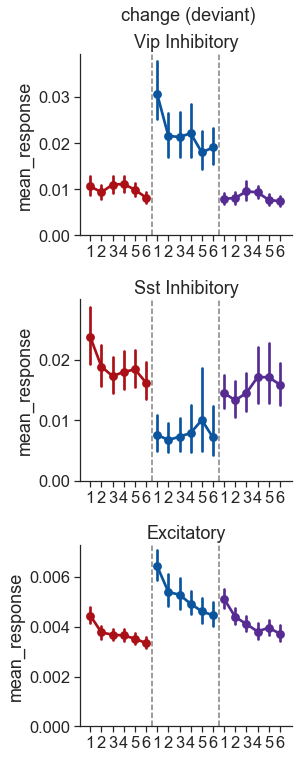

In [24]:
xticks = [experience_epoch.split(' ')[-1] for experience_epoch in np.sort(df.experience_epoch.unique())]

palette = utils.get_experience_level_colors()
fig, ax = plt.subplots(3,1, figsize=(4.5,10.5), sharex=False, sharey=False)

for i,cell_type in enumerate(cell_types):
    data = df[df.cell_type==cell_type]
    ax[i] = sns.pointplot(data=data, x='experience_epoch', y='mean_response', hue='experience_level',
                       order=experience_epoch, palette=palette, ax=ax[i])
    ax[i].set_ylim(ymin=0)
    ax[i].set_title(cell_type)
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
#     ax[i].set_ylim(0,0.022)
#     ax[i].set_xticklabels(experience_epoch, rotation=90);
    ax[i].set_xticklabels(xticks)
    ax[i].vlines(x=5.5, ymin=0, ymax=1, color='gray', linestyle='--')
    ax[i].vlines(x=11.5, ymin=0, ymax=1, color='gray', linestyle='--')
plt.suptitle('change (deviant)', x=0.62, y=1.01, fontsize=18)
fig.tight_layout()

### population averages

C:\Users\marinag\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


107


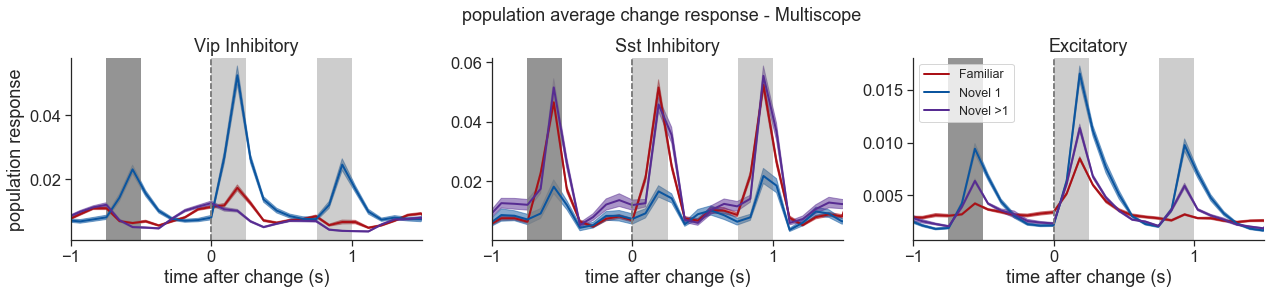

In [25]:
# plot
project_code = 'VisualBehaviorMultiscope'
# get timestamps 
multiscope_expt = experiments_table[experiments_table.project_code==project_code].index.values[9] 
timestamps = ppf.get_timestamps_for_response_df_type(cache, multiscope_expt, df_name)

axes_column = 'cell_type'
hue_column = 'experience_level'
palette = utilities.get_experience_level_colors()
xlim_seconds = [-1,1.5]

tmp = df[df.project_code==project_code]
# df = df[df.experience_level!='Novel >1']
# df = df[df.pref_stim==True]

ppf.plot_population_averages_for_conditions(tmp, df_name, timestamps, 
                                            axes_column, hue_column, project_code=project_code,
                                            use_events=use_events, filter_events=filter_events, 
                                            xlim_seconds=xlim_seconds, palette=palette,
                                            horizontal=True, save_dir=None, folder=None)

107


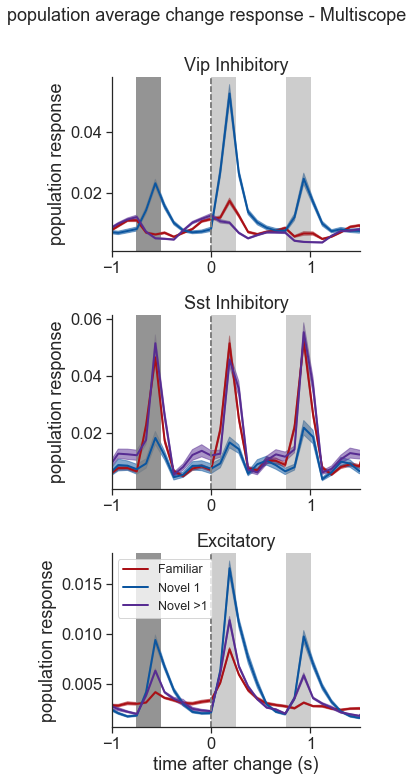

In [26]:
# plot
project_code = 'VisualBehaviorMultiscope'
# get timestamps 
multiscope_expt = experiments_table[experiments_table.project_code==project_code].index.values[9] 
timestamps = ppf.get_timestamps_for_response_df_type(cache, multiscope_expt, df_name)

axes_column = 'cell_type'
hue_column = 'experience_level'
palette = utilities.get_experience_level_colors()
xlim_seconds = [-1,1.5]

tmp = df[df.project_code==project_code]
# df = df[df.experience_level!='Novel >1']
# df = df[df.pref_stim==True]

ppf.plot_population_averages_for_conditions(tmp, df_name, timestamps, 
                                            axes_column, hue_column, project_code=project_code,
                                            use_events=use_events, filter_events=filter_events, 
                                            xlim_seconds=xlim_seconds, palette=palette,
                                            horizontal=False, save_dir=None, folder=None)

### limit to containers with all 3 experience levels for closest familiar sessions and second novel session that is truly the second exposure, including passive, 

In [16]:
df = multi_session_df.copy()
df = utilities.limit_to_second_novel_exposure(df)
df = utilities.limit_to_last_familiar_second_novel(df)
df = utilities.limit_to_containers_with_all_experience_levels(df)

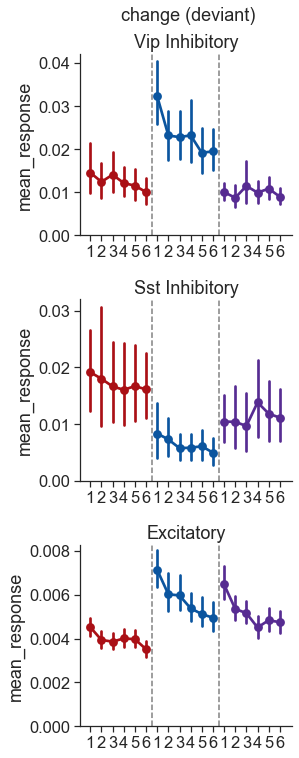

In [17]:
xticks = [experience_epoch.split(' ')[-1] for experience_epoch in np.sort(df.experience_epoch.unique())]

palette = utils.get_experience_level_colors()
fig, ax = plt.subplots(3,1, figsize=(4.5,10.5), sharex=False, sharey=False)

for i,cell_type in enumerate(cell_types):
    data = df[df.cell_type==cell_type]
    ax[i] = sns.pointplot(data=data, x='experience_epoch', y='mean_response', hue='experience_level',
                       order=experience_epoch, palette=palette, ax=ax[i])
    ax[i].set_ylim(ymin=0)
    ax[i].set_title(cell_type)
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
#     ax[i].set_ylim(0,0.022)
#     ax[i].set_xticklabels(experience_epoch, rotation=90);
    ax[i].set_xticklabels(xticks)
    ax[i].vlines(x=5.5, ymin=0, ymax=1, color='gray', linestyle='--')
    ax[i].vlines(x=11.5, ymin=0, ymax=1, color='gray', linestyle='--')
plt.suptitle('change (deviant)', x=0.62, y=1.01, fontsize=18)
fig.tight_layout()

In [10]:
df = multi_session_df.copy()
df = df[df.passive==False]
df['prior_exposures_to_image_set'] = [int(x) for x in df.prior_exposures_to_image_set.values]

fig, ax = plt.subplots(1,3, figsize=(15,4))
for i, cell_type in enumerate(cell_types):
    ax[i] = sns.pointplot(data=df[(df.cell_type==cell_type)&(df.experience_level!='Familiar')],
                  x='prior_exposures_to_image_set', y='mean_response', 
                       join=False, dodge=0.5, ax=ax[i])
    ax[i].set_title(cell_type)
#     ax[i].legend(title='', fontsize='small', bbox_to_anchor=(1,1))
fig.tight_layout()

NameError: name 'multi_session_df' is not defined

### limit to containers with all 3 levels for closest active sessions

In [27]:
df = multi_session_df.copy()
df = utilities.limit_to_last_familiar_second_novel_active(df)
df = utilities.limit_to_containers_with_all_experience_levels(df)

In [28]:
utilities.count_mice_expts_containers_cells(df)

n_mouse_id  n_ophys_experiment_id  \
cell_type      experience_level                                      
Excitatory     Familiar                  34                     62   
               Novel 1                   34                     62   
               Novel >1                  34                     62   
Sst Inhibitory Familiar                  15                     30   
               Novel 1                   15                     30   
               Novel >1                  15                     30   
Vip Inhibitory Familiar                  17                     42   
               Novel 1                   17                     42   
               Novel >1                  17                     42   

                                 n_ophys_container_id  n_cell_specimen_id  
cell_type      experience_level                                            
Excitatory     Familiar                            62                7302  
               Novel 1                             62                7974  
               Novel >1                            62                7544  
Sst Inhibitory Familiar                            30                 321  
               Novel 1                             30                 337  
               Novel >1                            30                 320  
Vip Inhibitory Familiar                            42                 794  
               Novel 1                             42                 718  
               Novel >1                            42                 765

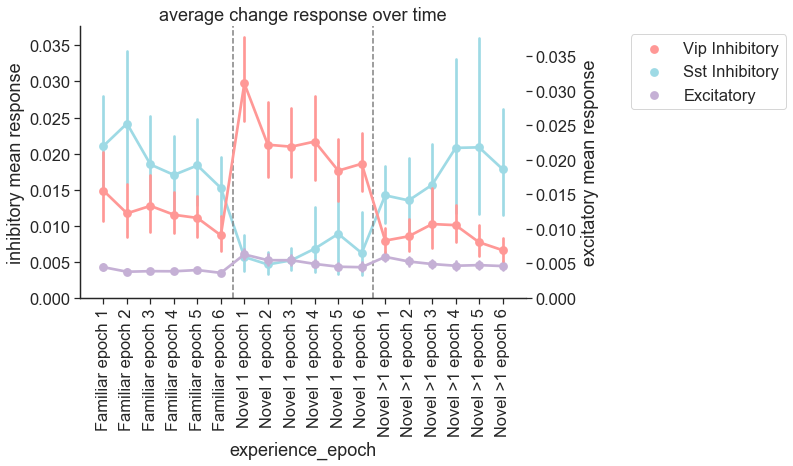

In [29]:
fig, ax = plt.subplots(figsize=(8,5))
ax2 = ax.twinx()
cre_line_colors = utils.get_cre_line_colors()
ax2 = sns.pointplot(data=df[df.cell_type==cell_types[0]], x='experience_epoch', y='mean_response', hue='cell_type', 
                   order=experience_epoch, palette=cre_line_colors, hue_order=cell_types, ax=ax2)
ax2.set_ylabel('excitatory mean response')
ax2.legend(bbox_to_anchor=(1.6,1))
ax2.set_ylim(ymin=0)
ax = sns.pointplot(data=df[df.cell_type.isin(cell_types[1:])], x='experience_epoch', y='mean_response', hue='cell_type', 
                   order=experience_epoch, palette=cre_line_colors[1:], hue_order=cell_types[1:], ax=ax)
ax.set_ylabel('inhibitory mean response')
ax.set_ylim(ymin=0)
# ax.legend(bbox_to_anchor=(1.2,1))
ax.get_legend().remove()
ax.set_xticklabels(experience_epoch, rotation=90);
ax.set_title('average change response over time')
ax.vlines(x=5.5, ymin=0, ymax=1, color='gray', linestyle='--')
ax.vlines(x=11.5, ymin=0, ymax=1, color='gray', linestyle='--')

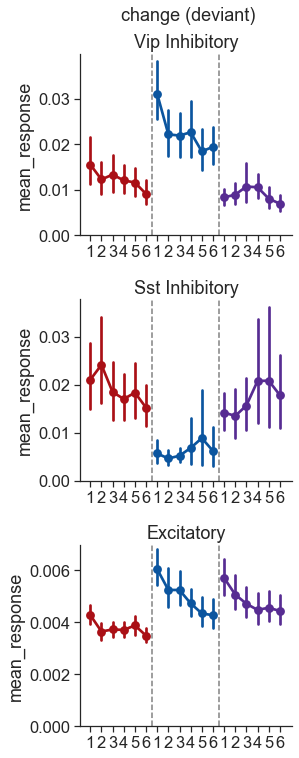

In [30]:
xticks = [experience_epoch.split(' ')[-1] for experience_epoch in np.sort(df.experience_epoch.unique())]

palette = utils.get_experience_level_colors()
fig, ax = plt.subplots(3,1, figsize=(4.5,10.5), sharex=False, sharey=False)

for i,cell_type in enumerate(cell_types):
    data = df[df.cell_type==cell_type]
    ax[i] = sns.pointplot(data=data, x='experience_epoch', y='mean_response', hue='experience_level',
                       order=experience_epoch, palette=palette, ax=ax[i])
    ax[i].set_ylim(ymin=0)
    ax[i].set_title(cell_type)
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
#     ax[i].set_ylim(0,0.022)
#     ax[i].set_xticklabels(experience_epoch, rotation=90);
    ax[i].set_xticklabels(xticks)
    ax[i].vlines(x=5.5, ymin=0, ymax=1, color='gray', linestyle='--')
    ax[i].vlines(x=11.5, ymin=0, ymax=1, color='gray', linestyle='--')
plt.suptitle('change (deviant)', x=0.62, y=1.01, fontsize=18)
fig.tight_layout()

In [31]:
# # plot
# project_code = 'VisualBehaviorMultiscope'
# # get timestamps 
# multiscope_expt = experiments_table[experiments_table.project_code==project_code].index.values[9] 
# timestamps = ppf.get_timestamps_for_response_df_type(cache, multiscope_expt, df_name)

# axes_column = 'cell_type'
# hue_column = 'experience_level'
# palette = utilities.get_experience_level_colors()
# xlim_seconds = [-1,1.5]

# sdf = df[df.project_code==project_code].copy()
# # df = df[df.experience_level!='Novel >1']
# # df = df[df.pref_stim==True]
# sdf = sdf.reset_index(drop=True)
# indices = [index for index in sdf.index if len(sdf.iloc[index].mean_trace) == len(sdf.mean_trace.values[0])]
# sdf = sdf.loc[indices]

# ppf.plot_population_averages_for_conditions(sdf, df_name, timestamps, 
#                                             axes_column, hue_column, project_code=project_code,
#                                             use_events=use_events, filter_events=filter_events, 
#                                             xlim_seconds=xlim_seconds, palette=palette,
#                                             horizontal=False, save_dir=None, folder=None)




### limit to matched cells in all 3

In [32]:
df = multi_session_df.copy()
df = utilities.limit_to_cell_specimen_ids_matched_in_all_experience_levels(df)

In [33]:
utilities.count_mice_expts_containers_cells(df)

n_mouse_id  n_ophys_experiment_id  \
cell_type      experience_level                                      
Excitatory     Familiar                  36                    226   
               Novel 1                   36                     71   
               Novel >1                  36                    142   
Sst Inhibitory Familiar                  15                    112   
               Novel 1                   15                     36   
               Novel >1                  15                     84   
Vip Inhibitory Familiar                  17                    137   
               Novel 1                   17                     44   
               Novel >1                  17                     96   

                                 n_ophys_container_id  n_cell_specimen_id  
cell_type      experience_level                                            
Excitatory     Familiar                            71                5695  
               Novel 1                             71                5695  
               Novel >1                            71                5695  
Sst Inhibitory Familiar                            36                 292  
               Novel 1                             36                 292  
               Novel >1                            36                 292  
Vip Inhibitory Familiar                            44                 540  
               Novel 1                             44                 540  
               Novel >1                            44                 540

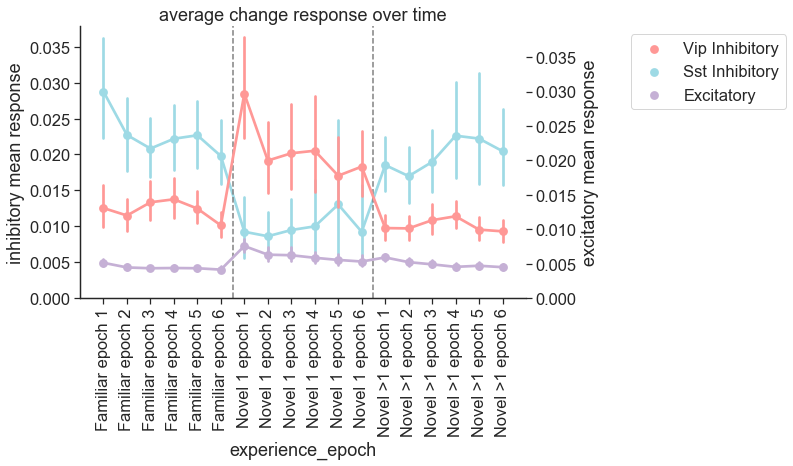

In [34]:
fig, ax = plt.subplots(figsize=(8,5))
ax2 = ax.twinx()
cre_line_colors = utils.get_cre_line_colors()
ax2 = sns.pointplot(data=df[df.cell_type==cell_types[0]], x='experience_epoch', y='mean_response', hue='cell_type', 
                   order=experience_epoch, palette=cre_line_colors, hue_order=cell_types, ax=ax2)
ax2.set_ylabel('excitatory mean response')
ax2.legend(bbox_to_anchor=(1.6,1))
ax2.set_ylim(ymin=0)
ax = sns.pointplot(data=df[df.cell_type.isin(cell_types[1:])], x='experience_epoch', y='mean_response', hue='cell_type', 
                   order=experience_epoch, palette=cre_line_colors[1:], hue_order=cell_types[1:], ax=ax)
ax.set_ylabel('inhibitory mean response')
ax.set_ylim(ymin=0)
# ax.legend(bbox_to_anchor=(1.2,1))
ax.get_legend().remove()
ax.set_xticklabels(experience_epoch, rotation=90);
ax.set_title('average change response over time')
ax.vlines(x=5.5, ymin=0, ymax=0.04, color='gray', linestyle='--')
ax.vlines(x=11.5, ymin=0, ymax=0.04, color='gray', linestyle='--')

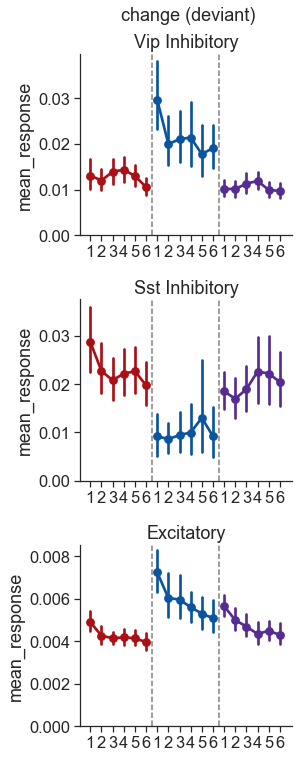

In [35]:


xticks = [experience_epoch.split(' ')[-1] for experience_epoch in np.sort(df.experience_epoch.unique())]

palette = utils.get_experience_level_colors()
fig, ax = plt.subplots(3,1, figsize=(4.5,10.5), sharex=False, sharey=False)

for i,cell_type in enumerate(cell_types):
    data = df[df.cell_type==cell_type]
    ax[i] = sns.pointplot(data=data, x='experience_epoch', y='mean_response', hue='experience_level',
                       order=experience_epoch, palette=palette, ax=ax[i])
    ax[i].set_ylim(ymin=0)
    ax[i].set_title(cell_type)
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
#     ax[i].set_ylim(0,0.022)
#     ax[i].set_xticklabels(experience_epoch, rotation=90);
    ax[i].set_xticklabels(xticks)
    ax[i].vlines(x=5.5, ymin=0, ymax=1, color='gray', linestyle='--')
    ax[i].vlines(x=11.5, ymin=0, ymax=1, color='gray', linestyle='--')
plt.suptitle('change (deviant)', x=0.62, y=1.01, fontsize=18)
fig.tight_layout()

In [36]:
# # plot
# project_code = 'VisualBehaviorMultiscope'
# # get timestamps 
# multiscope_expt = experiments_table[experiments_table.project_code==project_code].index.values[9] 
# timestamps = ppf.get_timestamps_for_response_df_type(cache, multiscope_expt, df_name)

# axes_column = 'cell_type'
# hue_column = 'experience_level'
# palette = utilities.get_experience_level_colors()
# xlim_seconds = [-1,1.5]

# tmp = df[df.project_code==project_code]
# # df = df[df.experience_level!='Novel >1']
# # df = df[df.pref_stim==True]

# ppf.plot_population_averages_for_conditions(tmp, df_name, timestamps, 
#                                             axes_column, hue_column, project_code=project_code,
#                                             use_events=use_events, filter_events=filter_events, 
#                                             xlim_seconds=xlim_seconds, palette=palette,
#                                             horizontal=False, save_dir=None, folder=None)

### limit to matched cells in closest active sessions

In [47]:
df = multi_session_df.copy()
df = utilities.limit_to_last_familiar_second_novel_active(df)
df = utilities.limit_to_cell_specimen_ids_matched_in_all_experience_levels(df)

In [48]:
utilities.count_mice_expts_containers_cells(df)

n_mouse_id  n_ophys_experiment_id  \
cell_type      experience_level                                      
Excitatory     Familiar                  34                     62   
               Novel 1                   34                     62   
               Novel >1                  34                     62   
Sst Inhibitory Familiar                  14                     28   
               Novel 1                   14                     28   
               Novel >1                  14                     28   
Vip Inhibitory Familiar                  17                     41   
               Novel 1                   17                     41   
               Novel >1                  17                     41   

                                 n_ophys_container_id  n_cell_specimen_id  
cell_type      experience_level                                            
Excitatory     Familiar                            62                3326  
               Novel 1                             62                3326  
               Novel >1                            62                3326  
Sst Inhibitory Familiar                            28                 200  
               Novel 1                             28                 200  
               Novel >1                            28                 200  
Vip Inhibitory Familiar                            41                 415  
               Novel 1                             41                 415  
               Novel >1                            41                 415

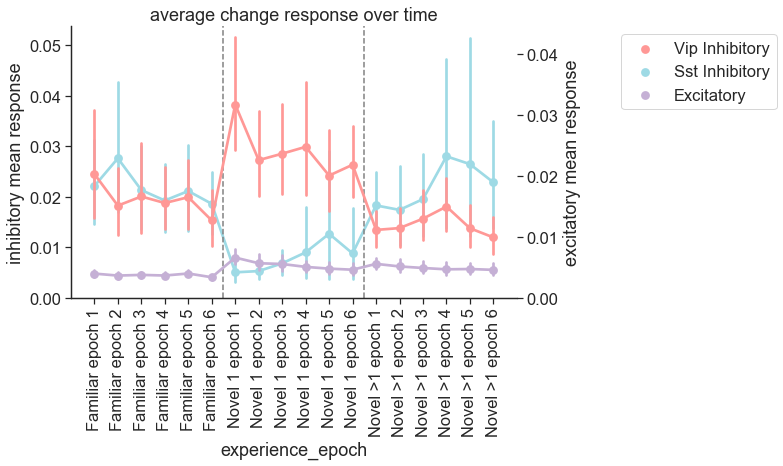

In [49]:
fig, ax = plt.subplots(figsize=(8,5))
ax2 = ax.twinx()
cre_line_colors = utils.get_cre_line_colors()
ax2 = sns.pointplot(data=df[df.cell_type==cell_types[0]], x='experience_epoch', y='mean_response', hue='cell_type', 
                   order=experience_epoch, palette=cre_line_colors, hue_order=cell_types, ax=ax2)
ax2.set_ylabel('excitatory mean response')
ax2.legend(bbox_to_anchor=(1.6,1))
ax2.set_ylim(ymin=0)
ax = sns.pointplot(data=df[df.cell_type.isin(cell_types[1:])], x='experience_epoch', y='mean_response', hue='cell_type', 
                   order=experience_epoch, palette=cre_line_colors[1:], hue_order=cell_types[1:], ax=ax)
ax.set_ylabel('inhibitory mean response')
ax.set_ylim(ymin=0)
# ax.legend(bbox_to_anchor=(1.2,1))
ax.get_legend().remove()
ax.set_xticklabels(experience_epoch, rotation=90);
ax.set_title('average change response over time')
ax.vlines(x=5.5, ymin=0, ymax=1, color='gray', linestyle='--')
ax.vlines(x=11.5, ymin=0, ymax=1, color='gray', linestyle='--')

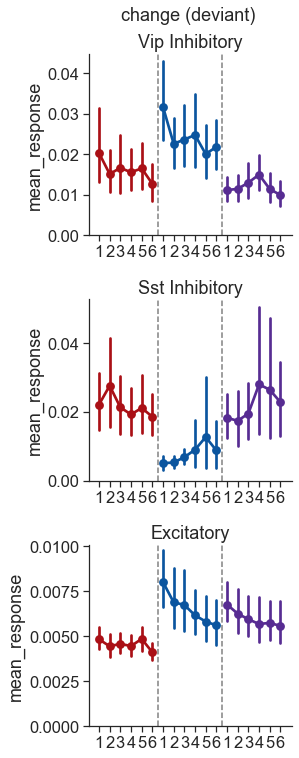

In [40]:
xticks = [experience_epoch.split(' ')[-1] for experience_epoch in np.sort(df.experience_epoch.unique())]

palette = utils.get_experience_level_colors()
fig, ax = plt.subplots(3,1, figsize=(4.5,10.5), sharex=False, sharey=False)

for i,cell_type in enumerate(cell_types):
    data = df[df.cell_type==cell_type]
    ax[i] = sns.pointplot(data=data, x='experience_epoch', y='mean_response', hue='experience_level',
                       order=experience_epoch, palette=palette, ax=ax[i])
    ax[i].set_ylim(ymin=0)
    ax[i].set_title(cell_type)
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
#     ax[i].set_ylim(0,0.022)
#     ax[i].set_xticklabels(experience_epoch, rotation=90);
    ax[i].set_xticklabels(xticks)
    ax[i].vlines(x=5.5, ymin=0, ymax=1, color='gray', linestyle='--')
    ax[i].vlines(x=11.5, ymin=0, ymax=1, color='gray', linestyle='--')
plt.suptitle('change (deviant)', x=0.62, y=1.01, fontsize=18)
fig.tight_layout()

In [41]:
# # plot
# project_code = 'VisualBehaviorMultiscope'
# # get timestamps 
# multiscope_expt = experiments_table[experiments_table.project_code==project_code].index.values[9] 
# timestamps = ppf.get_timestamps_for_response_df_type(cache, multiscope_expt, df_name)

# axes_column = 'cell_type'
# hue_column = 'experience_level'
# palette = utilities.get_experience_level_colors()
# xlim_seconds = [-1,1.5]

# tmp = df[df.project_code==project_code]
# # df = df[df.experience_level!='Novel >1']
# # df = df[df.pref_stim==True]

# ppf.plot_population_averages_for_conditions(tmp, df_name, timestamps, 
#                                             axes_column, hue_column, project_code=project_code,
#                                             use_events=use_events, filter_events=filter_events, 
#                                             xlim_seconds=xlim_seconds, palette=palette,
#                                             horizontal=False, save_dir=None, folder=None)




### heatmap of all mice epoch level responses

In [14]:
df = multi_session_df.copy()
df = utilities.limit_to_containers_with_all_experience_levels(df)

In [15]:
df = df.sort_values(by=['experience_level', 'mouse_id'])

In [16]:
data = df[df.epoch!=6].copy() # get rid of weird last epoch
data = data.groupby(['experience_level', 'epoch', 'cell_type', 'mouse_id', ]).mean()[['mean_response']].unstack(level=[0,1])
data.columns = data.columns.droplevel()

#### by mouse_id

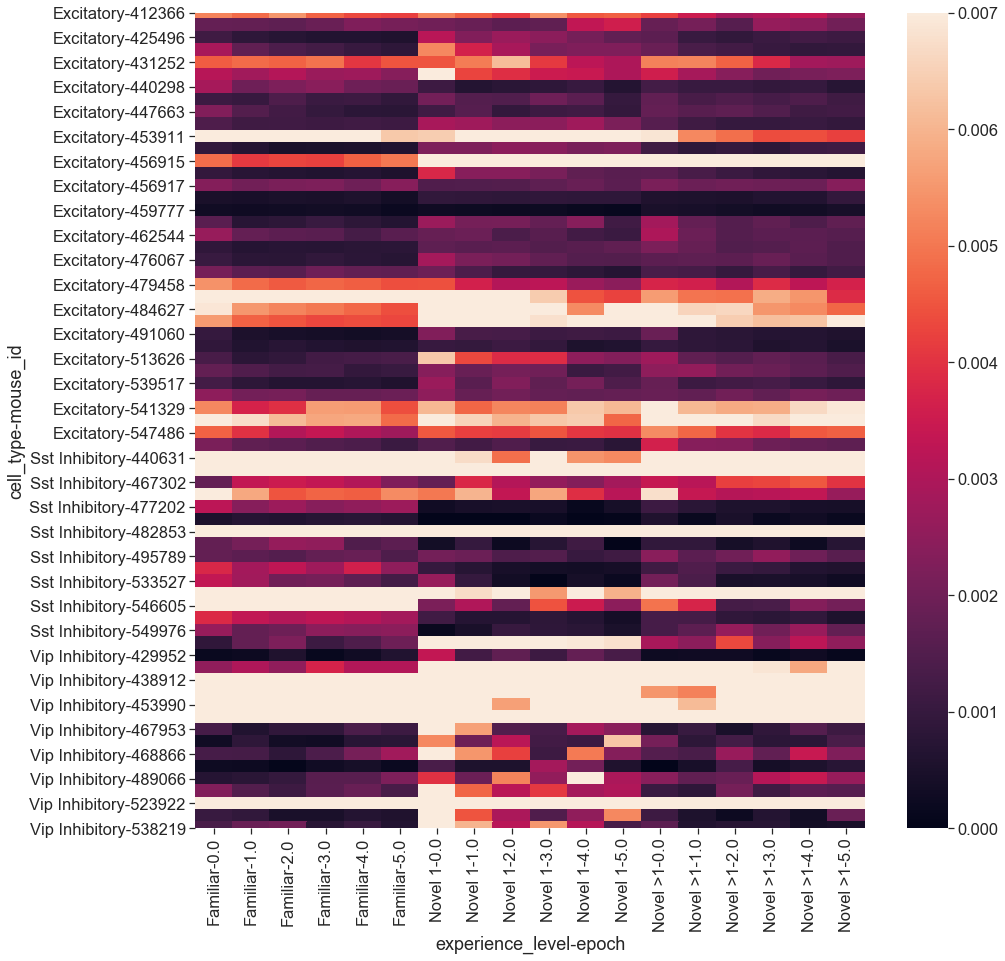

In [17]:
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(data, vmin=0, vmax=0.007, ax=ax)

### split by area and depth

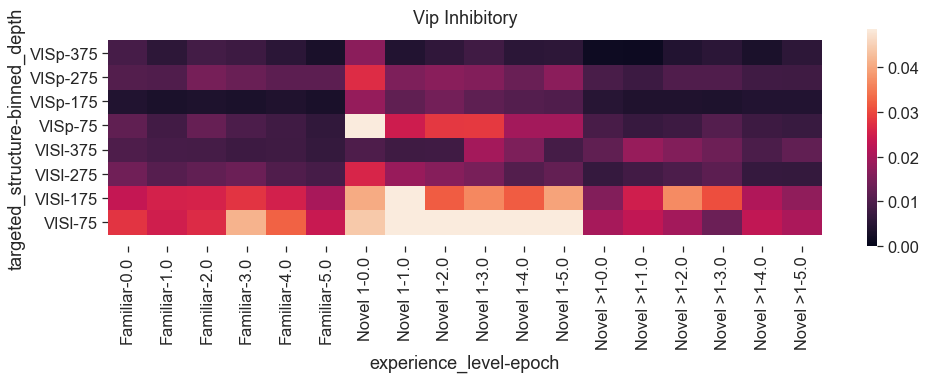

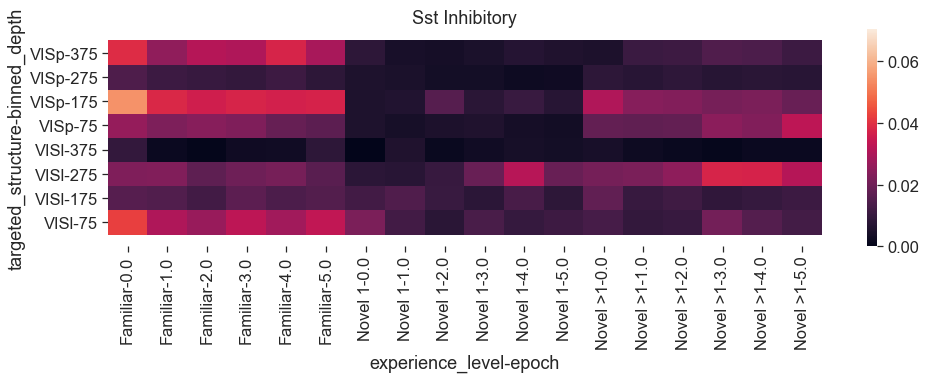

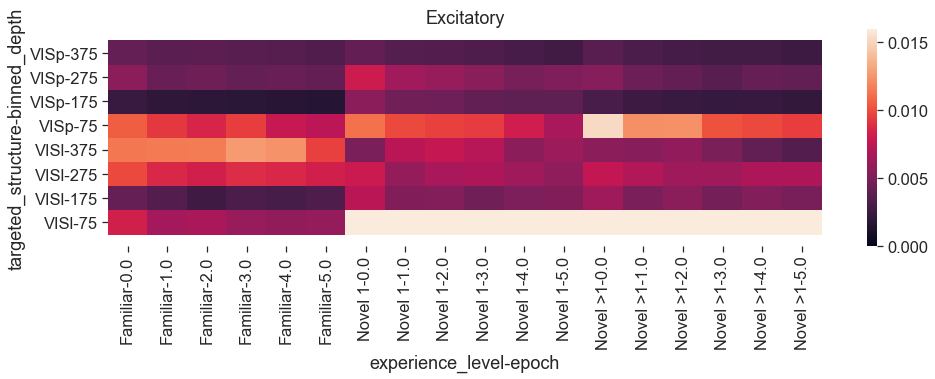

In [18]:
conditions = ['experience_level', 'epoch', 'targeted_structure', 'binned_depth']
for cell_type in cell_types:
    # avg over mice
    data = df[df.epoch!=6].copy() # get rid of weird last epoch
    data = data[data.cell_type==cell_type]
    data = data.sort_values(by=conditions)
    data = data.groupby(conditions).mean()[['mean_response']].unstack(level=[0,1])
    data.columns = data.columns.droplevel()
    
    fig, ax = plt.subplots(figsize=(16,4))
    ax = sns.heatmap(data, vmin=0, vmax=np.percentile(df[df.cell_type==cell_type].mean_response.values, 95), ax=ax)
    ax.set_title(cell_type)
    ax.set_ylim(-0.5, data.shape[0]+0.5)

### compare cell class specific response for each area & depth

In [28]:
experience_levels = np.sort(df.experience_level.unique())


In [49]:
np.sort(area_data.area_binned_depth.unique())

array(['VISp_175', 'VISp_275', 'VISp_375', 'VISp_75'], dtype=object)

Text(0.49, 0.98, 'VISl')

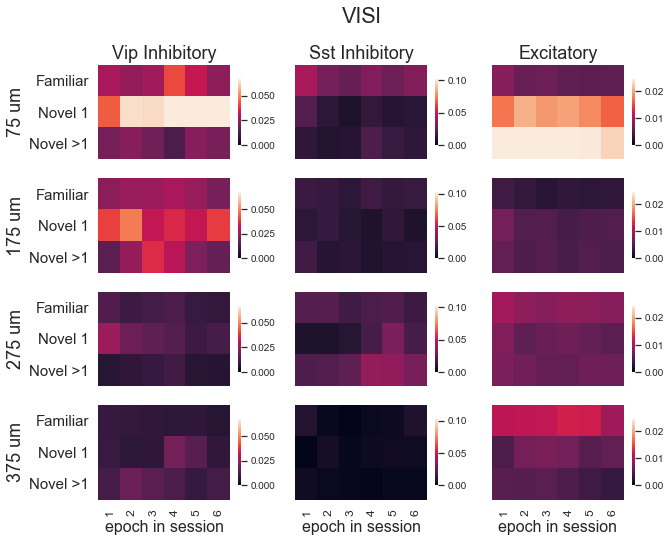

In [101]:
conditions = ['cell_type', 'epoch', 'experience_level']

data = df.copy()
data = data[data.project_code=='VisualBehaviorMultiscope']
targeted_structure = 'VISl'
area_data = data[(data.targeted_structure==targeted_structure)]
# area_binned_depths = ['VISp_75', 'VISp_175', 'VISp_275', 'VISp_375']
binned_depths = [75, 175, 275, 375]

fig, ax = plt.subplots(4, 3, figsize=(10,8), sharex=True, sharey=True)
ax = ax.ravel()
i = 0
for a, binned_depth in enumerate(binned_depths):
    for c, cell_type in enumerate(cell_types):
        ct_data = area_data[(area_data.binned_depth==binned_depth)&(area_data.cell_type==cell_type)]
        ct_data = ct_data.sort_values(by=conditions)
        ct_data = ct_data.groupby(conditions).mean()[['mean_response']].unstack(level=[0,1])
        ct_data.columns = ct_data.columns.droplevel()
        ax[i] = sns.heatmap(data=ct_data, cbar_kws={'shrink':0.7},
                            vmin=0, vmax=np.percentile(data[data.cell_type==cell_type].mean_response.values, 95), ax=ax[i])
        cbar = ax[i].collections[0].colorbar
        cbar.ax.tick_params(labelsize=10)
        ax[i].set_ylim(0, ct_data.shape[0])
        ax[i].set_xlabel('')
        ax[i].set_xticklabels(np.arange(1,7,1), fontsize=12)
        ax[i].set_yticklabels(experience_levels, rotation=0, fontsize=15)
        ax[i].tick_params(left=False, bottom=False) 
        
        if c == 0:
            ax[i].set_ylabel(str(binned_depth)+' um')
        else:
            ax[i].set_ylabel('')
        if a == 0: 
            ax[i].set_title(cell_type)
        if a == 3:
            ax[i].set_xlabel('epoch in session', fontsize=16)
        i+=1
plt.gca().invert_yaxis()
fig.suptitle(targeted_structure, x=0.49, y=.98)

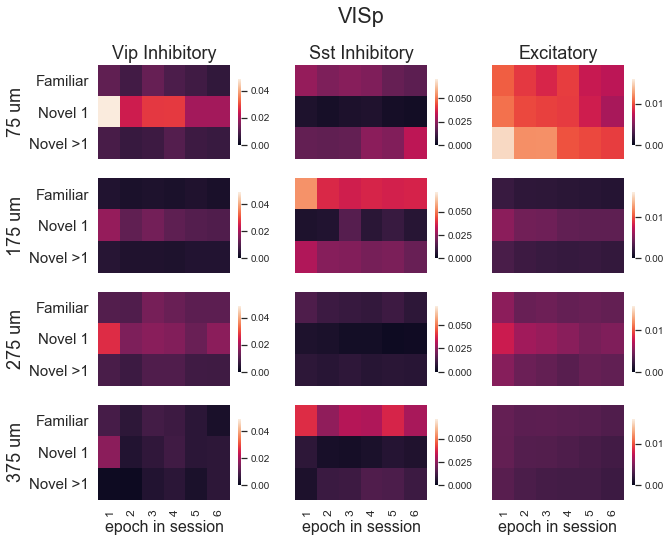

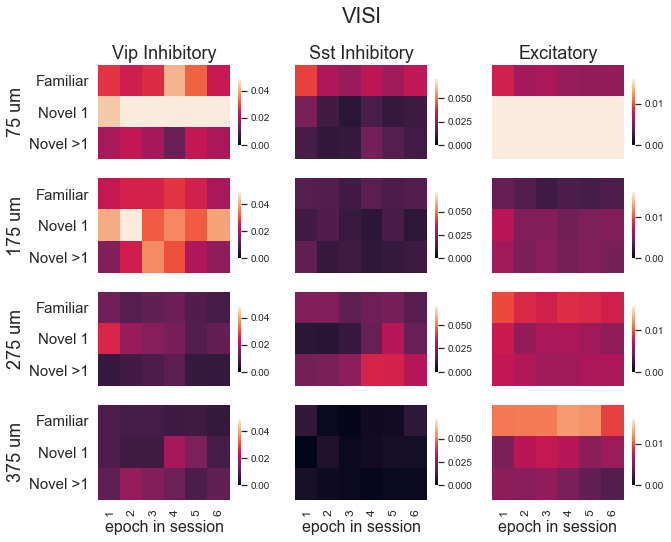

In [99]:
conditions = ['cell_type', 'epoch', 'experience_level']

data = df.copy()
for targeted_structure in data.targeted_structure.unique():
    area_data = data[(data.targeted_structure==targeted_structure)]
    # area_binned_depths = ['VISp_75', 'VISp_175', 'VISp_275', 'VISp_375']
    binned_depths = [75, 175, 275, 375]

    fig, ax = plt.subplots(4, 3, figsize=(10,8), sharex=True, sharey=True)
    ax = ax.ravel()
    i = 0
    for a, binned_depth in enumerate(binned_depths):
        for c, cell_type in enumerate(cell_types):
            ct_data = area_data[(area_data.binned_depth==binned_depth)&(area_data.cell_type==cell_type)]
            ct_data = ct_data.sort_values(by=conditions)
            ct_data = ct_data.groupby(conditions).mean()[['mean_response']].unstack(level=[0,1])
            ct_data.columns = ct_data.columns.droplevel()
            ax[i] = sns.heatmap(data=ct_data, cbar_kws={'shrink':0.7},
                                vmin=0, vmax=np.percentile(data[data.cell_type==cell_type].mean_response.values, 95), ax=ax[i])
            cbar = ax[i].collections[0].colorbar
            cbar.ax.tick_params(labelsize=10)
            ax[i].set_ylim(0, ct_data.shape[0])
            ax[i].set_xlabel('')
            ax[i].set_xticklabels(np.arange(1,7,1), fontsize=12)
            ax[i].set_yticklabels(experience_levels, rotation=0, fontsize=15)
            ax[i].tick_params(left=False, bottom=False) 

            if c == 0:
                ax[i].set_ylabel(str(binned_depth)+' um')
            else:
                ax[i].set_ylabel('')
            if a == 0: 
                ax[i].set_title(cell_type)
            if a == 3:
                ax[i].set_xlabel('epoch in session', fontsize=16)
            i+=1
    plt.gca().invert_yaxis()
    fig.suptitle(targeted_structure, x=0.49, y=.98)

### cell counts per condition

In [ ]:
data = df.copy()
data = data[data.epoch==0]

In [110]:
cell_counts = data.groupby(['cell_type', 'area_binned_depth', 'experience_level']).count()[['cell_specimen_id']].rename(columns={'cell_specimen_id':'n_cells'})

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(cell_counts)

                                                   n_cells
cell_type      area_binned_depth experience_level         
Excitatory     VISl_175          Familiar            13320
                                 Novel 1              3684
                                 Novel >1             6294
               VISl_275          Familiar            11328
                                 Novel 1              3852
                                 Novel >1             8616
               VISl_375          Familiar              990
                                 Novel 1               330
                                 Novel >1              444
               VISl_75           Familiar             3738
                                 Novel 1              1230
                                 Novel >1             1830
               VISp_175          Familiar            20862
                                 Novel 1              7350
                                 Novel >1            107

### matched cells only

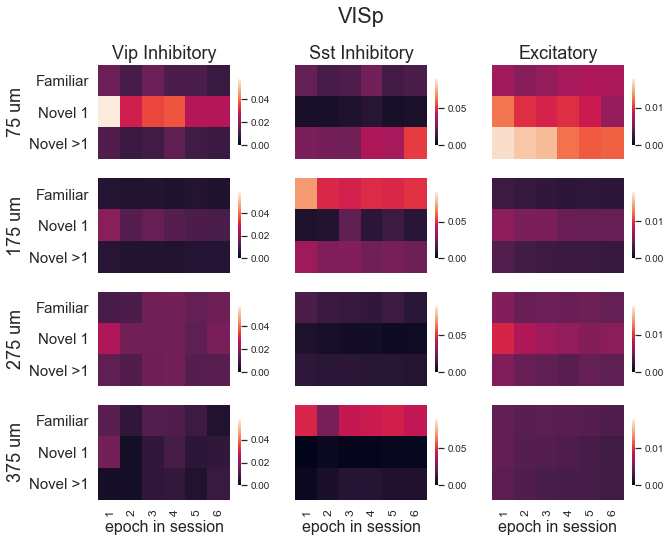

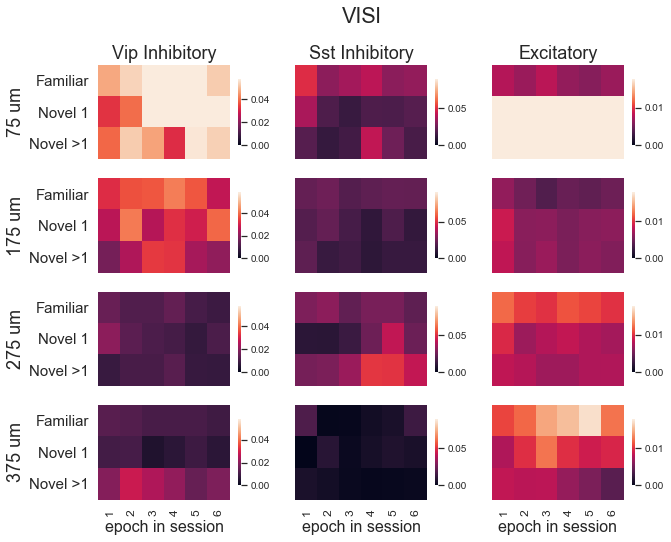

In [111]:
conditions = ['cell_type', 'epoch', 'experience_level']

data = df.copy()
data = utilities.limit_to_cell_specimen_ids_matched_in_all_experience_levels(data)

for targeted_structure in data.targeted_structure.unique():
    area_data = data[(data.targeted_structure==targeted_structure)]
    # area_binned_depths = ['VISp_75', 'VISp_175', 'VISp_275', 'VISp_375']
    binned_depths = [75, 175, 275, 375]

    fig, ax = plt.subplots(4, 3, figsize=(10,8), sharex=True, sharey=True)
    ax = ax.ravel()
    i = 0
    for a, binned_depth in enumerate(binned_depths):
        for c, cell_type in enumerate(cell_types):
            ct_data = area_data[(area_data.binned_depth==binned_depth)&(area_data.cell_type==cell_type)]
            ct_data = ct_data.sort_values(by=conditions)
            ct_data = ct_data.groupby(conditions).mean()[['mean_response']].unstack(level=[0,1])
            ct_data.columns = ct_data.columns.droplevel()
            ax[i] = sns.heatmap(data=ct_data, cbar_kws={'shrink':0.7},
                                vmin=0, vmax=np.percentile(data[data.cell_type==cell_type].mean_response.values, 95), ax=ax[i])
            cbar = ax[i].collections[0].colorbar
            cbar.ax.tick_params(labelsize=10)
            ax[i].set_ylim(0, ct_data.shape[0])
            ax[i].set_xlabel('')
            ax[i].set_xticklabels(np.arange(1,7,1), fontsize=12)
            ax[i].set_yticklabels(experience_levels, rotation=0, fontsize=15)
            ax[i].tick_params(left=False, bottom=False) 

            if c == 0:
                ax[i].set_ylabel(str(binned_depth)+' um')
            else:
                ax[i].set_ylabel('')
            if a == 0: 
                ax[i].set_title(cell_type)
            if a == 3:
                ax[i].set_xlabel('epoch in session', fontsize=16)
            i+=1
    plt.gca().invert_yaxis()
    fig.suptitle(targeted_structure, x=0.49, y=.98)

In [112]:
data = df.copy()
data = data[data.epoch==0]
data = utilities.limit_to_cell_specimen_ids_matched_in_all_experience_levels(data)


cell_counts = data.groupby(['cell_type', 'area_binned_depth', 'experience_level']).count()[['cell_specimen_id']].rename(columns={'cell_specimen_id':'n_cells'})

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(cell_counts)

                                                   n_cells
cell_type      area_binned_depth experience_level         
Excitatory     VISl_175          Familiar             1078
                                 Novel 1               425
                                 Novel >1              607
               VISl_275          Familiar              960
                                 Novel 1               392
                                 Novel >1              698
               VISl_375          Familiar               54
                                 Novel 1                26
                                 Novel >1               39
               VISl_75           Familiar              256
                                 Novel 1               107
                                 Novel >1              143
               VISp_175          Familiar             5307
                                 Novel 1              2061
                                 Novel >1             32

In [69]:
data = df.copy()

means = data.groupby(['cell_type', 'experience_level', 'area_binned_depth']).mean()[['mean_response']].reset_index()

In [70]:
means['condition'] = means.area_binned_depth+'_'+means.experience_level
data['condition'] = data.area_binned_depth+'_'+data.experience_level

In [71]:
cell_type = cell_types[0]
cell_type_means = means[means.cell_type==cell_type] 

In [72]:
order = np.argsort(cell_type_means.mean_response.values)
condition_order = cell_type_means.condition.values[order]

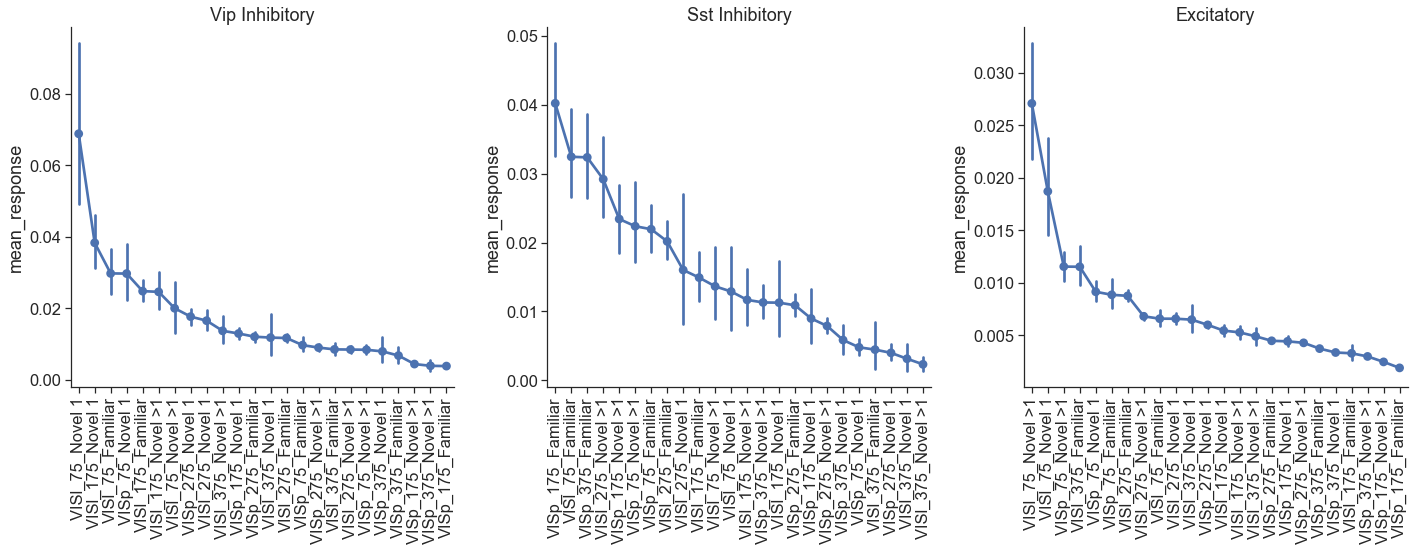

In [76]:
fig, ax = plt.subplots(1,3, figsize=(20,8))
for i, cell_type in enumerate(cell_types):
    cell_type_means = means[means.cell_type==cell_type] 
    order = np.argsort(cell_type_means.mean_response.values)
    condition_order = cell_type_means.condition.values[order][::-1]
    ax[i] = sns.pointplot(data = data[data.cell_type==cell_type], x='condition', y='mean_response', 
                  order=condition_order, ax=ax[i])
    ax[i].set_xticklabels(condition_order, rotation=90)
    ax[i].set_xlabel('')
    ax[i].set_title(cell_type)
fig.tight_layout()

Text(0.53, 1.04, 'full dataset')

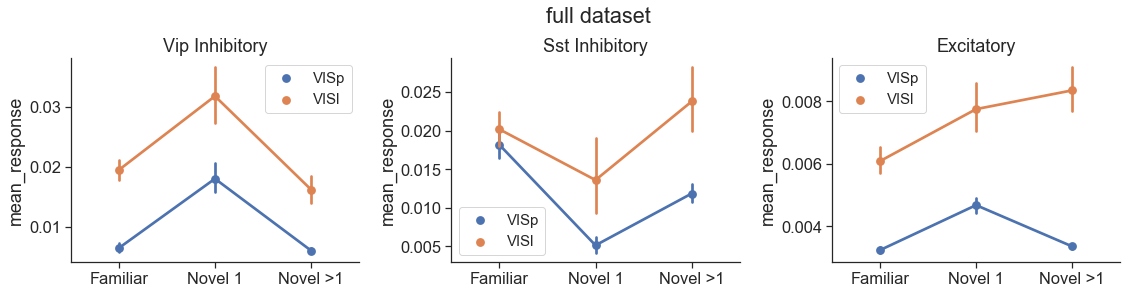

In [92]:
data = df.copy()

fig, ax = plt.subplots(1,3, figsize=(16,4))
for i, cell_type in enumerate(cell_types):
    ax[i] = sns.pointplot(data=data[data.cell_type==cell_type], x='experience_level', y='mean_response', hue='targeted_structure', 
             hue_order=['VISp', 'VISl'], ax=ax[i])
#     ax[i].set_xticklabels(condition_order, rotation=90)
    ax[i].set_xlabel('')
    ax[i].set_title(cell_type)
    ax[i].legend(title='', fontsize='small')
fig.tight_layout()
plt.suptitle('full dataset', x=0.53, y=1.04)

Text(0.54, 1.04, 'VisualBehaviorMultiscope only')

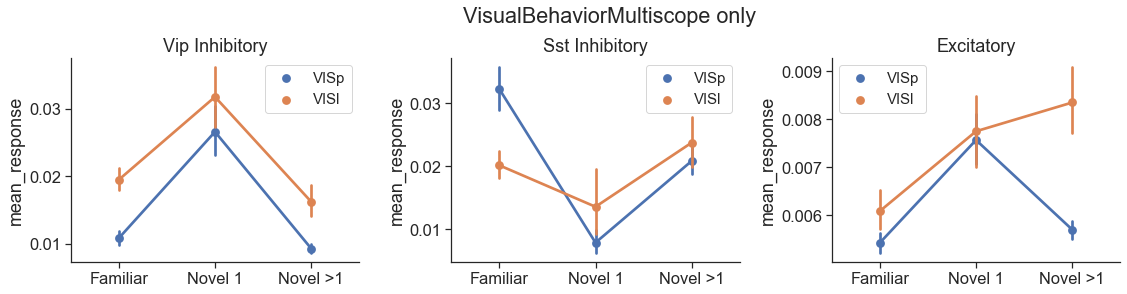

In [93]:
data = df.copy()
data = data[data.project_code=='VisualBehaviorMultiscope']
fig, ax = plt.subplots(1,3, figsize=(16,4))
for i, cell_type in enumerate(cell_types):
    ax[i] = sns.pointplot(data=data[data.cell_type==cell_type], x='experience_level', y='mean_response', hue='targeted_structure', 
             hue_order=['VISp', 'VISl'], ax=ax[i])
#     ax[i].set_xticklabels(condition_order, rotation=90)
    ax[i].set_xlabel('')
    ax[i].set_title(cell_type)
    ax[i].legend(title='', fontsize='small')
fig.tight_layout()
plt.suptitle('VisualBehaviorMultiscope only', x=0.54, y=1.04)

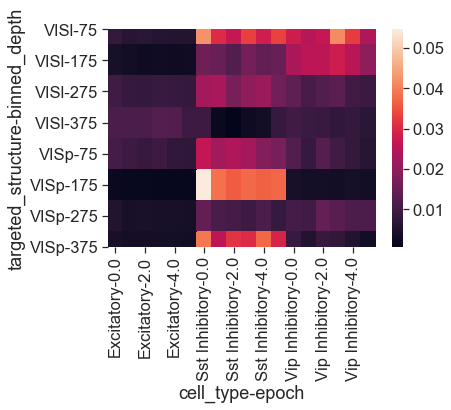

In [25]:
 fig, ax = plt.subplots(figsize=(6,4))
ax = sns.heatmap(data, vmin=0, vmax=np.percentile(df[df.cell_type==cell_type].mean_response.values, 95), ax=ax)
ax.set_title(cell_type)
ax.set_ylim(-0.5, data.shape[0]+0.5)

In [26]:
import scipy.stats as stats

In [ ]:
stats.zscore()

In [ ]:
df[df.e]